In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")
sns.set_style("dark")

In [2]:
# non-windows moment 
# Move to the parent directory
%cd ..
# Create the 'data' directory in the parent directory
!mkdir -p data
# Install kaggle if not already installed
%pip install kaggle
# Download the dataset to the 'data' directory in the parent directory
!kaggle datasets download -d parisrohan/credit-score-classification -p ./data/


/home/kaiser/work/repos/dataset-sessions/credit-score
Note: you may need to restart the kernel to use updated packages.
Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
credit-score-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip -u data/credit-score-classification.zip -d data
%pwd
%cd ./eda

Archive:  data/credit-score-classification.zip
/home/kaiser/work/repos/dataset-sessions/credit-score/eda


In [7]:
train_df = pd.read_csv("../data/train.csv", decimal=".", engine="python")
test_df = pd.read_csv("../data/test.csv", decimal=".", engine="python")
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


# EDA
Objective: Start by getting a basic understanding of the dataset. This includes checking the data types of columns, identifying missing values (NaNs), and understanding the overall structure of the data.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
duplicate_rows_df = train_df[train_df.duplicated()]
print("number of duplicate rows: ", len(duplicate_rows_df))

number of duplicate rows:  0


In [10]:
train_df = train_df.drop_duplicates()
train_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


How many unique clients do we have?

In [11]:
len(train_df["Customer_ID"].unique())

100000

Identifying columns that are incorrectly typed (e.g., numerical data stored as strings) and casting them to the correct data types. This is important for accurate analysis and modeling.

In [12]:
problem_columns_float = [
    "Annual_Income",
    "Changed_Credit_Limit",
    "Outstanding_Debt",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Monthly_Balance",
]
train_df[problem_columns_float]

,Annual_Income,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,19114.12,11.27,809.98,49.574949,80.41529543900253,312.49408867943663
1,19114.12,11.27,809.98,49.574949,118.28022162236736,284.62916249607184
2,19114.12,_,809.98,49.574949,81.699521264648,331.2098628537912
3,19114.12,6.27,809.98,49.574949,199.4580743910713,223.45130972736786
4,19114.12,11.27,809.98,49.574949,41.420153086217326,341.48923103222177
...,...,...,...,...,...,...
99995,39628.99,11.5,502.38,35.104023,60.97133255718485,479.86622816574095
99996,39628.99,11.5,502.38,35.104023,54.18595028760385,496.651610435322
99997,39628.99,11.5,502.38,35.104023,24.02847744864441,516.8090832742814
99998,39628.99,11.5,502.38,35.104023,251.67258219721603,319.1649785257098


In [13]:
train_df[problem_columns_float] = train_df[problem_columns_float].apply(
    pd.to_numeric, errors="coerce"
)
train_df[problem_columns_float] = train_df[problem_columns_float].astype("float64")
train_df.loc[:, problem_columns_float].fillna(
    value=train_df[problem_columns_float].median(),
    inplace=True,
)
train_df[problem_columns_float]

,Annual_Income,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,19114.12,11.27,809.98,49.574949,80.415295,312.494089
1,19114.12,11.27,809.98,49.574949,118.280222,284.629162
2,19114.12,NaN,809.98,49.574949,81.699521,331.209863
3,19114.12,6.27,809.98,49.574949,199.458074,223.451310
4,19114.12,11.27,809.98,49.574949,41.420153,341.489231
...,...,...,...,...,...,...
99995,39628.99,11.50,502.38,35.104023,60.971333,479.866228
99996,39628.99,11.50,502.38,35.104023,54.185950,496.651610
99997,39628.99,11.50,502.38,35.104023,24.028477,516.809083
99998,39628.99,11.50,502.38,35.104023,251.672582,319.164979


In [14]:
problem_columns_int = ["Num_of_Loan", "Num_of_Delayed_Payment", "Age"]
train_df[problem_columns_int]

,Num_of_Loan,Num_of_Delayed_Payment,Age
0,4,7,23
1,4,NaN,23
2,4,7,-500
3,4,4,23
4,4,NaN,23
...,...,...,...
99995,2,7,25
99996,2,7,25
99997,2,6,25
99998,2,NaN,25


In [15]:
train_df[problem_columns_int] = train_df[problem_columns_int].apply(
    pd.to_numeric, errors="coerce"
)
train_df[problem_columns_int] = train_df[problem_columns_int].astype(pd.Int32Dtype())
train_df.loc[:, problem_columns_int].fillna(
    value=train_df[problem_columns_int].median(), inplace=True
)
train_df[problem_columns_int]

,Num_of_Loan,Num_of_Delayed_Payment,Age
0,4,7,23
1,4,<NA>,23
2,4,7,-500
3,4,4,23
4,4,<NA>,23
...,...,...,...
99995,2,7,25
99996,2,7,25
99997,2,6,25
99998,2,<NA>,25


Prepare separate variables for different column types:

In [16]:
number_columns = train_df.select_dtypes("number").columns
categorical_columns = train_df.select_dtypes("object").columns.drop("Credit_Score")
feature_columns = categorical_columns.union(number_columns)
target = train_df["Credit_Score"]
number_columns, categorical_columns

(Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
       dtype='object'),
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
        'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
        'Payment_of_Min_Amount', 'Payment_Behaviour'],
       dtype='object'))

In [17]:
train_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.0,9.302000e+04,84998.000000,100000.000000,100000.00000,100000.000000,95215.0,100000.000000,90254.0,97909.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,98791.000000
mean,110.934505,1.785790e+05,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,1403.118217,195.539456,402.551258
std,689.407864,1.442878e+06,3183.686167,117.404834,129.05741,466.422621,62.50094,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,8306.041270,199.564527,213.925499
min,-500.0,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.0,-5.000000,-3.0,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.0,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,1.0,10.000000,9.0,5.320000,3.000000,566.080000,28.052567,30.306660,72.236692,270.106630
50%,33.0,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.0,18.000000,14.0,9.400000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.731225
75%,42.0,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,5.0,28.000000,18.0,14.870000,9.000000,1948.200000,36.496663,161.224249,236.815814,470.262938
max,8698.0,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.0,67.000000,4397.0,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   Int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   Int32  
 13  Type_of_Loan              88592 non-null   ob

## Some outliers

Identify and address outliers in the dataset, such as negative values where they don't make sense (e.g., age cannot be negative), or unrealistic values like an age of 8698.

In [19]:
train_df = train_df.drop(
    train_df[
        (train_df["Age"] < 0)
        | (train_df["Age"] > 100)
        | (train_df["Num_Bank_Accounts"] < 0)
        | (train_df["Num_of_Loan"] < 0)
        | (train_df["Num_of_Delayed_Payment"] < 0)
        | (train_df["Delay_from_due_date"] < 0)
    ].index
)
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


## Various plots
Using visualizations like box plots and pie charts to get insights into the distribution of data, detect outliers, and understand categorical distributions.

### Box plots

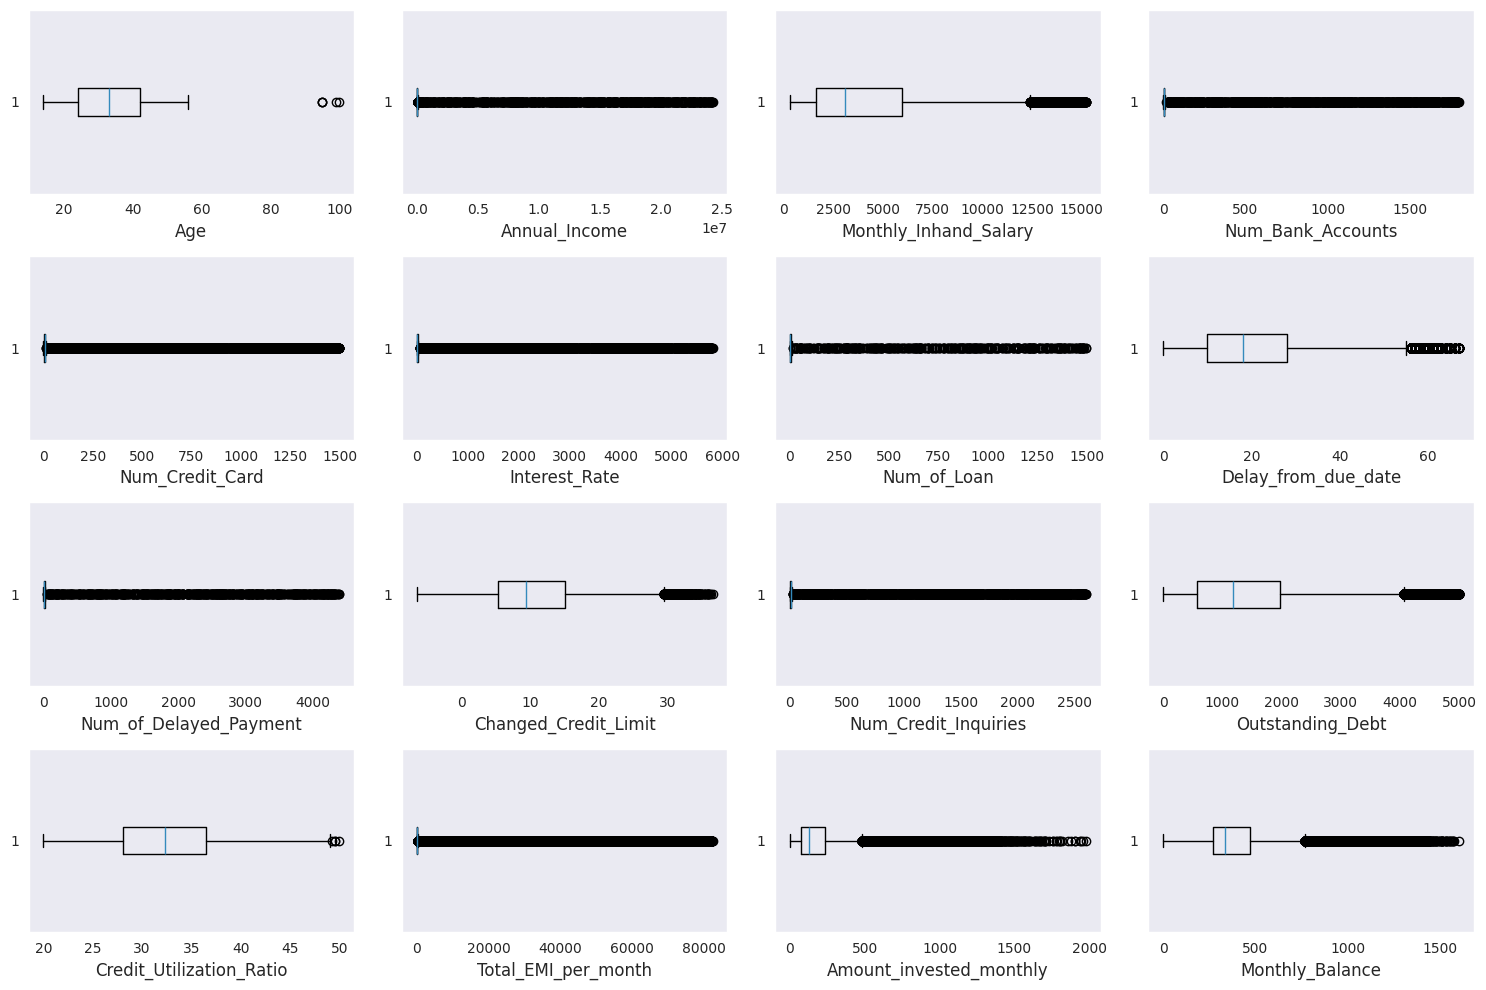

In [20]:
box_data = train_df[
    number_columns
]

nrows = 4

fig, axes = plt.subplots(nrows, len(number_columns)//nrows, figsize=(15, 10))

for i, column in enumerate(box_data.columns):
    row = i // (len(number_columns) // nrows)  
    col = i % (len(number_columns) // nrows) 


    non_nan_data = box_data[column].dropna()
    axes[row, col].boxplot(non_nan_data, vert=False)
    axes[row, col].set_xlabel(column)

plt.tight_layout()
plt.show()

This box plot shows that there are many outliers (points outside the whiskers), indicating possible data issues or extreme variability.

### Pie charts

In [21]:
train_df[
    [
        "Month",
        "Occupation",
        "Type_of_Loan",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
        "Credit_Score",
    ]
].value_counts()

Month     Occupation     Type_of_Loan                                                                                           Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour                 Credit_Score
February  Musician       Auto Loan                                                                                              Standard    Yes                    High_spent_Medium_value_payments  Standard        5
March     Engineer       Debt Consolidation Loan                                                                                Standard    Yes                    Low_spent_Small_value_payments    Standard        4
May       _______        Credit-Builder Loan                                                                                    Good        No                     High_spent_Medium_value_payments  Good            4
February  Mechanic       Not Specified                                                                                          Standard    Yes  

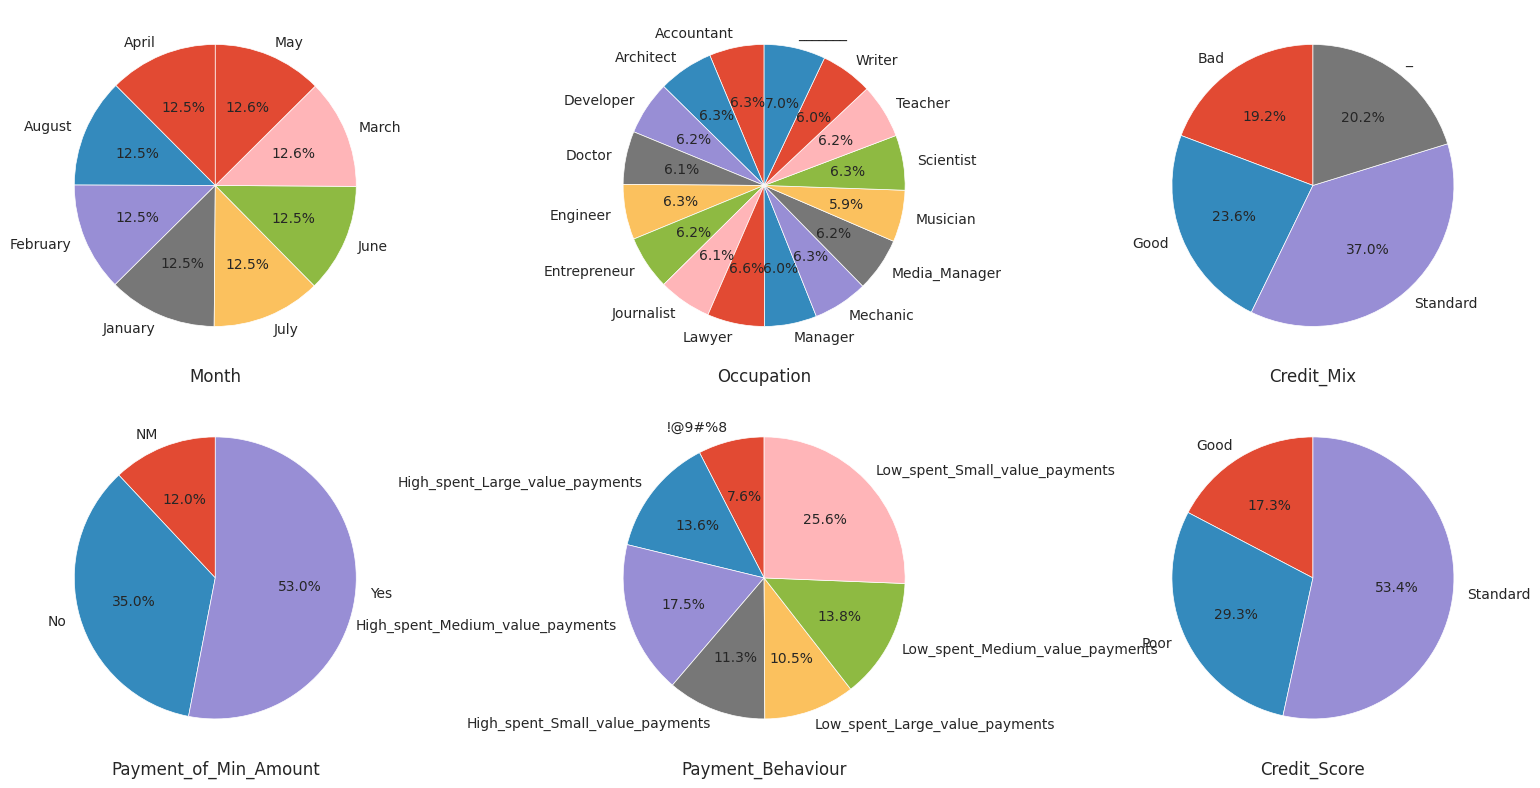

In [22]:
pie_data = train_df[
    [
        "Month",
        "Occupation",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
        "Credit_Score",
    ]
]

nrows = 2
ncols = 3  
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))

for i, column in enumerate(pie_data.columns):
    row = i // ncols
    col = i % ncols

    grouped_data = pie_data.groupby(column).size().reset_index(name="counts")

    # Extract data for the pie chart
    labels = grouped_data[column]
    sizes = grouped_data["counts"]

    # Plot pie chart in the correct subplot
    axes[row, col].pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
    axes[row, col].set_xlabel(column)

plt.tight_layout()
plt.show()

This pie chart shows the distribution of categories within 'categorical_column'. It reveals that some categories dominate the dataset, while others are underrepresented.

#### Donut charts (nested pie charts)

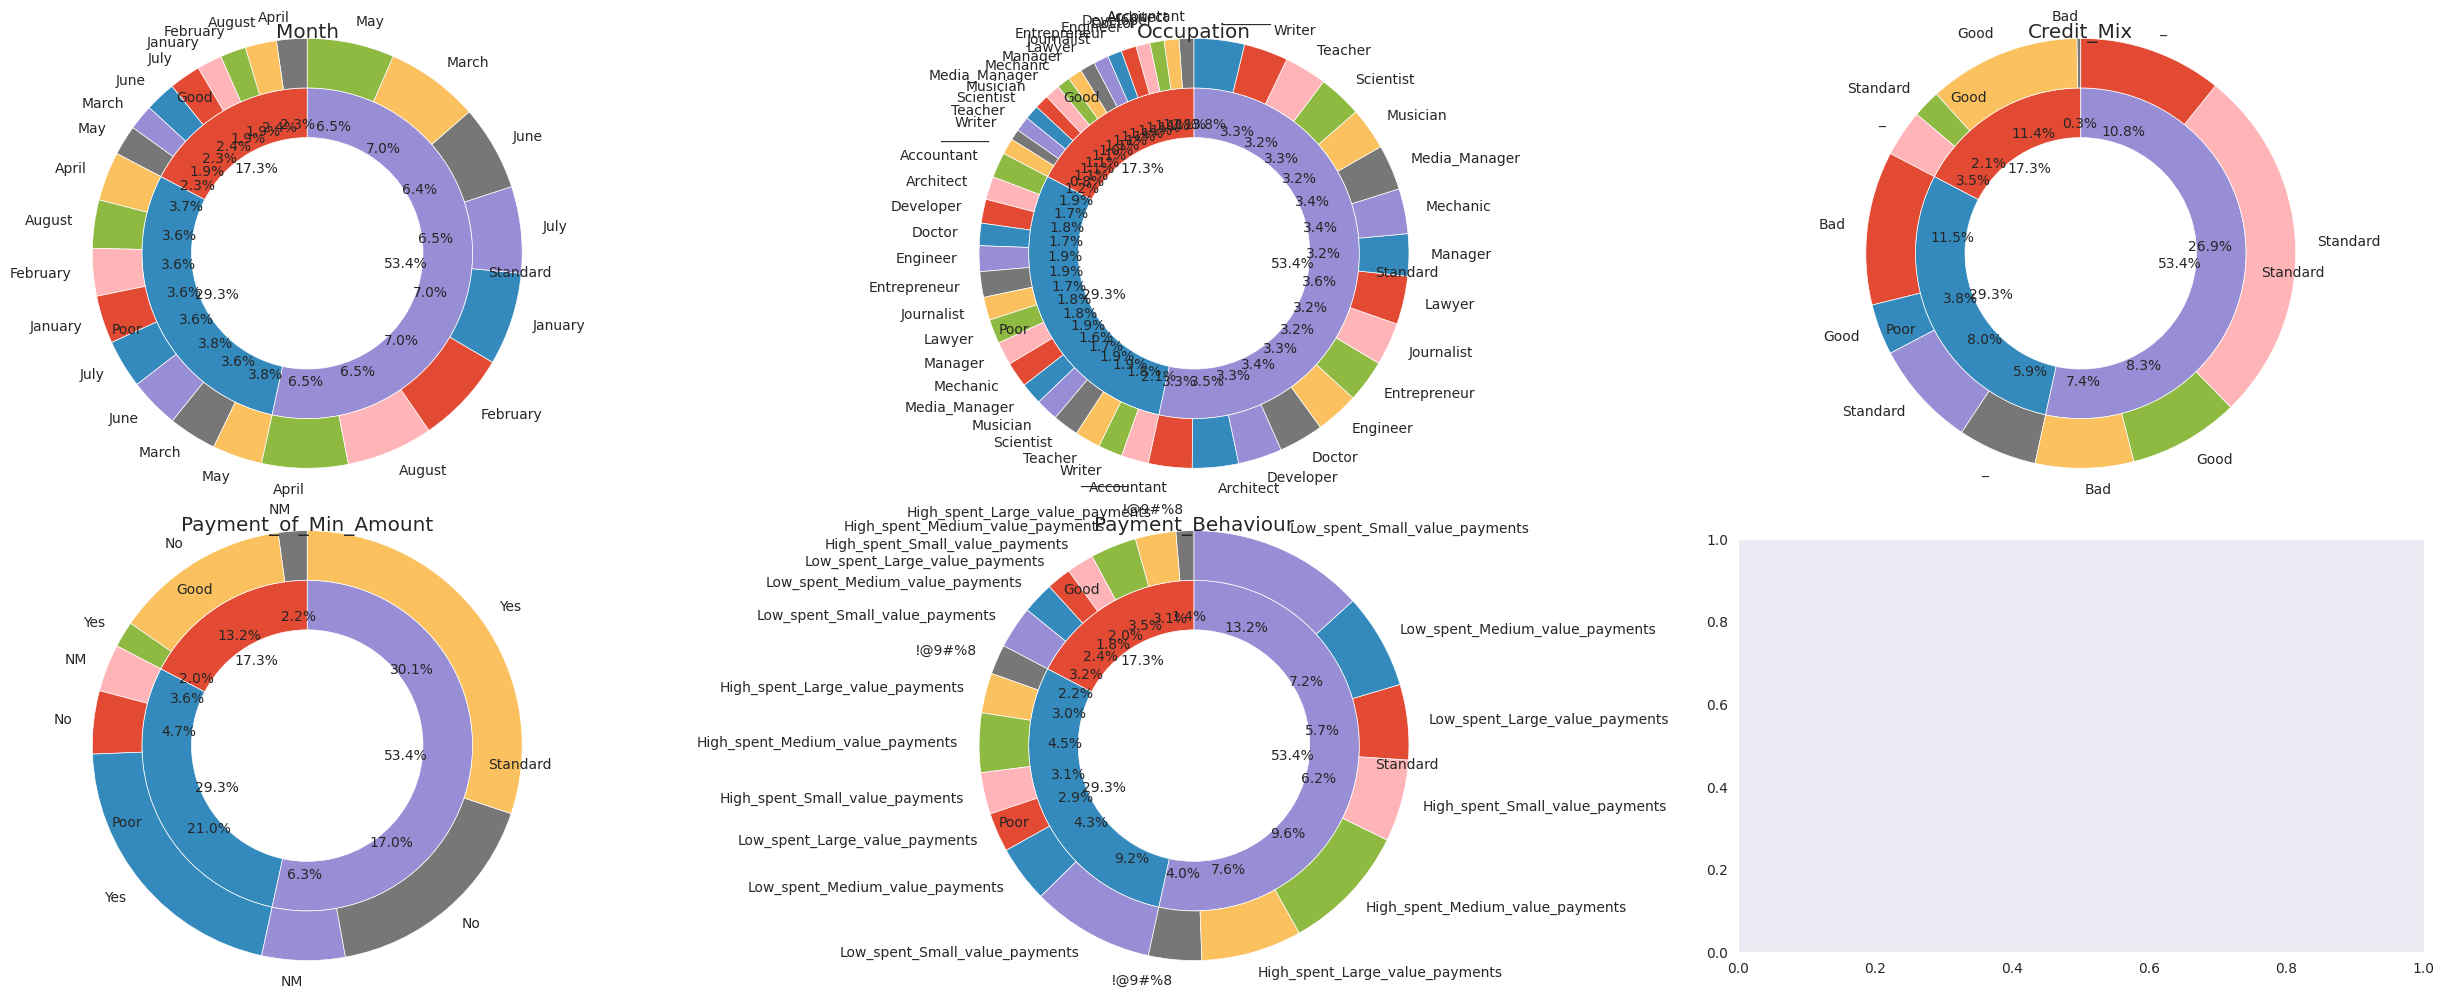

In [23]:
pie_data = train_df[
    [
        "Month",
        "Occupation",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
        "Credit_Score",
    ]
]

# Group by 'Credit_Score' for the inner layer
inner_group = pie_data.groupby('Credit_Score').size().reset_index(name='counts')
inner_labels = inner_group['Credit_Score']
inner_sizes = inner_group['counts']

# Define the outer layers (columns other than 'Credit_Score')
outer_columns = ["Month", "Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]

nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 10))

for i, column in enumerate(outer_columns):
    outer_group = pie_data.groupby(['Credit_Score', column]).size().reset_index(name='counts')
    
    row = i // ncols
    col = i % ncols

    # Create the outer labels and sizes based on the groups
    outer_labels = outer_group[column]
    outer_sizes = outer_group['counts']
    
    # Create the donut chart
    axes[row, col].pie(inner_sizes, labels=inner_labels, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'), autopct="%1.1f%%", startangle=90)
    axes[row, col].pie(outer_sizes, labels=outer_labels, radius=1.3, wedgeprops=dict(width=0.3, edgecolor='w'), autopct="%1.1f%%", startangle=90)
    
    # Add title for the outer layer
    axes[row, col].set_title(column)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

looks ugly

## Dealing with Missing Values & Feature Extraction
**Objective**: Identify columns with missing values and decide how to handle them (e.g., drop, fill, or impute). Also, extract new features from existing data to enhance the dataset.

Finding nulls in data:

In [24]:
train_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9236
Age                          4690
SSN                             0
Occupation                      0
Annual_Income                6489
Monthly_Inhand_Salary       13854
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4606
Type_of_Loan                10423
Delay_from_due_date             0
Num_of_Delayed_Payment       9042
Changed_Credit_Limit         1935
Num_Credit_Inquiries         1813
Credit_Mix                      0
Outstanding_Debt              939
Credit_Utilization_Ratio        0
Credit_History_Age           8363
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8082
Payment_Behaviour               0
Monthly_Balance              1133
Credit_Score                    0
dtype: int64

The 'Name' column is not crucial for our analysis since we have 'ID' as a unique identifier. We can safely drop the 'Name' column.

In [25]:
def delete_col(cols):
    """
    Drops a specified column from the DataFrame and its associated index variable.
    """
    global train_df, categorical_columns, number_columns
    train_df.drop(columns=cols, inplace=True)

    for col in cols:
        if col in categorical_columns:
            categorical_columns = categorical_columns.drop(col)
        else:
            number_columns = number_columns.drop(col)


delete_col(["Name", "ID", "SSN"])

Although usage of `nonlocal` is not recommended, in this case it is okay.

In [26]:
train_df["Credit_History_Age"].value_counts()

Credit_History_Age
15 Years and 11 Months    414
19 Years and 5 Months     409
19 Years and 4 Months     408
19 Years and 3 Months     408
17 Years and 9 Months     407
                         ... 
0 Years and 3 Months       19
33 Years and 7 Months      14
0 Years and 2 Months       13
33 Years and 8 Months      10
0 Years and 1 Months        1
Name: count, Length: 404, dtype: int64

### Transforming `Credit_History_Age`

In [27]:
train_df["Credit_History_Age"]

0         22 Years and 1 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
5         22 Years and 6 Months
6         22 Years and 7 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 92393, dtype: object

Convert the `Credit_History_Age` column to a int format to facilitate analysis and avoid creating too many columns during one-hot encoding.

In [28]:
split_credit_history = train_df["Credit_History_Age"].str.extract(
    r"(\d+)\sYears\sand\s(\d+)\sMonths"
)

total_months = split_credit_history[0].astype(
    pd.Int32Dtype()
) * 12 + split_credit_history[1].astype(pd.Int32Dtype())

train_df["Credit_History_Age"] = total_months
total_months

0        265
3        268
4        269
5        270
6        271
        ... 
99995    378
99996    379
99997    380
99998    381
99999    382
Length: 92393, dtype: Int32

### Handling `Type_of_Loan`
By splitting and exploding 'Type_of_Loan', we can handle cases where a single individual has multiple loans, making the data more granular and accurate for analysis.

In [29]:
train_df["Type_of_Loan"].value_counts().head(20)

Type_of_Loan
Not Specified                               1286
Credit-Builder Loan                         1164
Personal Loan                               1149
Student Loan                                1139
Debt Consolidation Loan                     1132
Payday Loan                                 1098
Mortgage Loan                               1075
Auto Loan                                   1073
Home Equity Loan                            1044
Personal Loan, and Student Loan              295
Not Specified, and Payday Loan               242
Student Loan, and Payday Loan                235
Credit-Builder Loan, and Not Specified       233
Mortgage Loan, and Home Equity Loan          232
Student Loan, and Credit-Builder Loan        221
Payday Loan, and Debt Consolidation Loan     220
Payday Loan, and Personal Loan               220
Payday Loan, and Auto Loan                   218
Payday Loan, and Student Loan                217
Credit-Builder Loan, and Mortgage Loan       215
Name: c

In [30]:
loan_types = [
    "Not Specified",
    "Credit-Builder Loan",
    "Personal Loan",
    "Debt Consolidation Loan",
    "Student Loan",
    "Payday Loan",
    "Mortgage Loan",
    "Auto Loan",
    "Home Equity Loan",
]

train_df["Type_of_Loan"].fillna("", inplace=True)
for suffix in loan_types:
    train_df["Type_of_Loan_" + suffix] = train_df["Type_of_Loan"].apply(
        lambda x: suffix in x.split(", ")
    )

delete_col(["Type_of_Loan"])

/tmp/ipykernel_144055/65363886.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Type_of_Loan"].fillna("", inplace=True)


In [31]:
train_df

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Type_of_Loan_Not Specified,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Student Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Auto Loan,Type_of_Loan_Home Equity Loan
0,0x1602,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
3,0x1605,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
4,0x1606,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
5,0x1607,June,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
6,0x1608,July,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Poor,False,False,False,False,False,False,False,True,False
99996,0x25fea,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Poor,False,False,False,False,False,False,False,True,False
99997,0x25feb,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,...,Poor,False,False,False,False,False,False,False,True,False
99998,0x25fec,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Standard,False,False,False,False,False,False,False,True,False


In [32]:
categorical_columns = categorical_columns.drop("Credit_History_Age")
number_columns = number_columns.append(pd.Index(["Credit_History_Age"]))
number_columns, categorical_columns

(Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
        'Credit_History_Age'],
       dtype='object'),
 Index(['ID', 'Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
        'Payment_Behaviour'],
       dtype='object'))

In [33]:
train_df = pd.get_dummies(
    train_df,
    columns=[
        "Month",
        "Occupation",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
    ],
    drop_first=True,
)
train_df = pd.get_dummies(train_df, columns=["Credit_Score"])
train_df

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,0x1602,23,19114.12,1824.843333,3,4,3,4,3,7,...,False,False,False,True,False,False,False,True,False,False
3,0x1605,23,19114.12,NaN,3,4,3,4,5,4,...,False,False,False,False,False,False,True,True,False,False
4,0x1606,23,19114.12,1824.843333,3,4,3,4,6,<NA>,...,False,False,True,False,False,False,False,True,False,False
5,0x1607,23,19114.12,NaN,3,4,3,4,8,4,...,False,False,False,False,False,False,False,True,False,False
6,0x1608,23,19114.12,1824.843333,3,4,3,4,3,<NA>,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,25,39628.99,3359.415833,4,6,7,2,23,7,...,False,True,False,False,False,False,False,False,True,False
99996,0x25fea,25,39628.99,3359.415833,4,6,7,2,18,7,...,False,False,True,False,False,False,False,False,True,False
99997,0x25feb,25,39628.99,3359.415833,4,6,5729,2,27,6,...,False,True,False,False,False,False,False,False,True,False
99998,0x25fec,25,39628.99,3359.415833,4,6,7,2,20,<NA>,...,False,False,False,False,True,False,False,False,False,True


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92393 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ID                                                  92393 non-null  object 
 1   Age                                                 87703 non-null  Int32  
 2   Annual_Income                                       85904 non-null  float64
 3   Monthly_Inhand_Salary                               78539 non-null  float64
 4   Num_Bank_Accounts                                   92393 non-null  int64  
 5   Num_Credit_Card                                     92393 non-null  int64  
 6   Interest_Rate                                       92393 non-null  int64  
 7   Num_of_Loan                                         87787 non-null  Int32  
 8   Delay_from_due_date                                 92393 non-null  int64  
 9   

In [35]:
from sklearn.impute import KNNImputer, SimpleImputer

id_column = train_df['Customer_ID']
features = train_df.drop(columns=['Customer_ID'])

knn_imputer = KNNImputer(
    n_neighbors=1
)  # at least 1 neighbor, because running one cell for 7 minutes is too harsh
# knn_imputer = SimpleImputer(strategy='median')


X_knn_imputed = knn_imputer.fit_transform(features)
X_knn_imputed

array([[2.30000000e+01, 1.91141200e+04, 1.82484333e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30000000e+01, 1.91141200e+04, 1.82484333e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30000000e+01, 1.91141200e+04, 1.82484333e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.50000000e+01, 3.96289900e+04, 3.35941583e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.50000000e+01, 3.96289900e+04, 3.35941583e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.50000000e+01, 3.96289900e+04, 3.35941583e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [36]:
train_df_knn_imputed = pd.DataFrame(X_knn_imputed, columns=features.columns, index=features.index).astype(features.dtypes.to_dict())
result_df = train_df_knn_imputed.copy()
result_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,False,False,False,True,False,False,False,True,False,False
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,...,False,False,False,False,False,False,True,True,False,False
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,...,False,False,True,False,False,False,False,True,False,False
5,23,19114.12,1824.843333,3,4,3,4,8,4,9.27,...,False,False,False,False,False,False,False,True,False,False
6,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,...,False,True,False,False,False,False,False,False,True,False
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,...,False,False,True,False,False,False,False,False,True,False
99997,25,39628.99,3359.415833,4,6,5729,2,27,6,11.50,...,False,True,False,False,False,False,False,False,True,False
99998,25,39628.99,3359.415833,4,6,7,2,20,1,11.50,...,False,False,False,False,True,False,False,False,False,True


In [37]:
id_column

0         0x1602
3         0x1605
4         0x1606
5         0x1607
6         0x1608
          ...   
99995    0x25fe9
99996    0x25fea
99997    0x25feb
99998    0x25fec
99999    0x25fed
Name: ID, Length: 92393, dtype: object

In [38]:
train_df_knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92393 entries, 0 to 99999
Data columns (total 62 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 92393 non-null  Int32  
 1   Annual_Income                                       92393 non-null  float64
 2   Monthly_Inhand_Salary                               92393 non-null  float64
 3   Num_Bank_Accounts                                   92393 non-null  int64  
 4   Num_Credit_Card                                     92393 non-null  int64  
 5   Interest_Rate                                       92393 non-null  int64  
 6   Num_of_Loan                                         92393 non-null  Int32  
 7   Delay_from_due_date                                 92393 non-null  int64  
 8   Num_of_Delayed_Payment                              92393 non-null  Int32  
 9   

# Baseline
Creating a simple baseline model before diving into complex modeling. This helps to understand the minimum performance we can expect.

In [39]:
preprocessed_df = train_df_knn_imputed.drop(
        columns=["Credit_Score_Good", "Credit_Score_Standard", "Credit_Score_Poor"]
    )
preprocessed_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,False,True,True,False,False,False,True,False,False,False
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,...,False,False,True,False,False,False,False,False,False,True
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,...,False,False,True,False,False,True,False,False,False,False
5,23,19114.12,1824.843333,3,4,3,4,8,4,9.27,...,False,False,True,False,False,False,False,False,False,False
6,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,...,False,True,True,False,True,False,False,False,False,False
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,...,False,True,True,False,False,True,False,False,False,False
99997,25,39628.99,3359.415833,4,6,5729,2,27,6,11.50,...,False,False,True,False,True,False,False,False,False,False
99998,25,39628.99,3359.415833,4,6,7,2,20,1,11.50,...,False,False,True,False,False,False,False,True,False,False


In [40]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_df,
    target[preprocessed_df.index],
    test_size=0.33,
    random_state=42,
)

dummy_classifier = DummyClassifier(random_state=42)
dummy_classifier.fit(X_train, y_train)
dummy_classifier.predict(X_test)

array(['Standard', 'Standard', 'Standard', ..., 'Standard', 'Standard',
       'Standard'], dtype='<U8')

In [41]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, dummy_classifier.predict(X_test))

0.3333333333333333

# Saving preprocessed data
Jupyter provides a %store magic command to pass variables between notebooks.

In [42]:
X = preprocessed_df
y = target[X.index] # because I've reduced length of dataset to 1000
%store X y

Stored 'X' (DataFrame)
Stored 'y' (Series)
